# **Deep learning project : real or not real disaster tweets ?**

##### **Importing appropriate librairies**

In [2]:
# Import Tensorflow & Pathlib librairies
import tensorflow as tf 
import pathlib 
import pandas as pd
import numpy as np 
import os
import io
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

##### **Loading the train and test data in a Pandas dataframe**

In [3]:
tweets_train = pd.read_csv("twitter_train.csv", error_bad_lines=False, encoding="utf-8")

##### **Getting a sense of the data**

In [4]:
tweets_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
tweets_train.shape

(7613, 5)

In [6]:
tweets_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
len(tweets_train["keyword"].unique())

222

In [8]:
len(tweets_train["location"].unique())

3342

##### **Checking the composition of the "target" column**

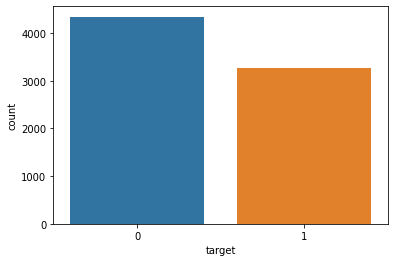

In [9]:
sns.countplot("target", data =tweets_train)

In [10]:
tweets_train["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
tweets = tweets_train[["text", "target"]]
tweets.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## **Data preprocessing and basic exploratory data analysis**


##### **Downloading a preprocessing package**

##### **Installing preprocess_kgptalkie available [here](https://github.com/laxmimerit/preprocess_kgptalkie)**

In [12]:
 !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-tdz_9pb5
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-tdz_9pb5
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11754 sha256=5cdca10ae73c1ce51f0f81ce17d879d1bbd9d42c45251b216aec2cdde203f3d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-2qph6t8n/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [13]:
import preprocess_kgptalkie as ps

In [14]:
tweet = ps.get_basic_features(tweets)

In [15]:
tweet.head()

,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


##### **Kernel density plots of the character counts of tweets when there is a disaster and when there is no disaster**

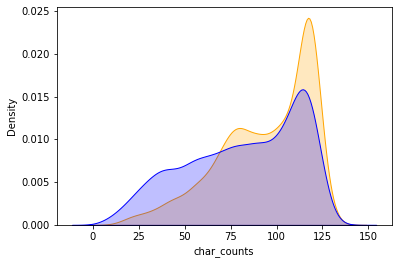

In [16]:
sns.kdeplot(tweet[tweet["target"]==1]["char_counts"], color = "orange", shade=True)
sns.kdeplot(tweet[tweet["target"]==0]["char_counts"], color = "blue", shade=True)

*This implies that the number of characters in tweets tend to be longer when there is a disaster.*

##### **Kernel density plots of the average word length of tweets when there is a disaster and when there is no disaster**

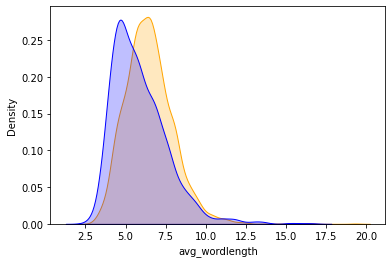

In [17]:
sns.kdeplot(tweet[tweet["target"]==1]["avg_wordlength"], color = "orange", shade=True)
sns.kdeplot(tweet[tweet["target"]==0]["avg_wordlength"], color = "blue", shade=True)

*This implies that the average length of words in tweets tend to be longer when there is a disaster.*

##### **Kernel density plots of the number of stop words contained in tweets when there is a disaster and when there is no disaster**

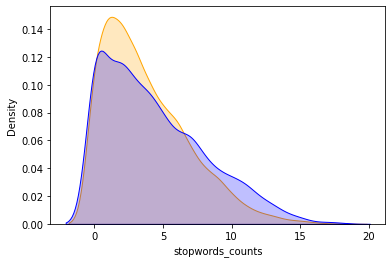

In [18]:
sns.kdeplot(tweet[tweet["target"]==1]["stopwords_counts"], color = "orange", shade=True)
sns.kdeplot(tweet[tweet["target"]==0]["stopwords_counts"], color = "blue", shade=True)

*This implies that there are less stop words in tweets when there is a disaster. Twittos try to give maximum information by reducing stop words.*

##### **Data cleaning in one go with the preprocess_kgptalkie library**

In [19]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [20]:
tweet.head()

,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


In [21]:
tweet["text"] = tweet["text"].apply(lambda x :get_clean(x))

In [22]:
tweet.head()

,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1
1,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0
2,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0
3,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0
4,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0


##### **Download all language elements related to the English language**

In [23]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 351 kB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


##### **Importing spacy and loading "en_core_web_sm"**

In [24]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

##### **Removing stop words**

In [25]:
 from spacy.lang.en.stop_words import STOP_WORDS

In [26]:
test = tweet.iloc[0,0]

In [27]:
test

'our deeds are the reason of this earthquake may allah forgive us all'

In [28]:
def remove_stop_words(text):
  text = " ".join([token.lemma_ for token in nlp(text) if token.text not in STOP_WORDS and token.lemma_ not in STOP_WORDS])
  return text

In [29]:
remove_stop_words(test)

'deed reason earthquake allah forgive'

In [30]:
tweet["text_wostop"] = tweet["text"].apply(lambda x: remove_stop_words(x))

In [31]:
tweet.head()

,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,text_wostop
0,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,deed reason earthquake allah forgive
1,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,resident ask shelter place notify officer evac...
3,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,130 people receive wildfire evacuation order c...
4,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,send photo ruby alaska smoke wildfire pour school


##### **Visualizing disaster tweets with Word cloud**

In [32]:
 real_disaster = ps.get_word_freqs(tweet[tweet["target"] == 1], "text_wostop")
 real_disaster =" ".join(real_disaster.index)
 real_disaster

'fire kill news disaster people crash california suicide bomb police family attack train like home storm building flood hiroshima year burn wildfire 2 emergency video car accident mh370 bombing nuclear collapse new minister death northern prime report cause dead legionnaire watch bomber man war evacuate confirm atomic obama find fatal come city look late today s life retweet forest debris malaysia live time japan near water mass miss derail thunderstorm earthquake severe wound migrant suspect issue wave fear hostage oil day world spill damage evacuation army die warning charge old rescue casualty work 70 area outbreak house derailment injure detonate murder wreckage plan terrorist weapon weather saudi save 40 3 service big rain bridge bus u update affect wind island know state destroy mosque 4 official body boy truck hit refugee release yous shoot set air rescuer anniversary drought sign hour reunion 2015 swallow wild help school county raze search officer hurricane 1 pkk typhoon uo 5 

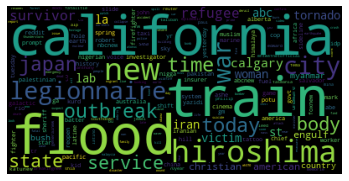

In [33]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(max_font_size=100).generate(real_disaster)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

##### **Visualizing non-disaster tweets with Word cloud**

In [34]:
fake_disaster = ps.get_word_freqs(tweet[tweet["target"] == 0], "text_wostop")
fake_disaster =" ".join(fake_disaster.index)
fake_disaster

'like new body love come time people video know good think want scream loud bag burn day laugh look 2 fire wreck let emergency 3 man youtube work need drown world panic feel life year blow ass retweet way s destroy sink fuck crush explode watch god help thank great news bad survive thing injury quarantine crash try today obliterate content right plan bomb reddit weapon read attack play deluge hot run demolish black fall cross collapse electrocute death collide 5 siren woman head fear start hear change big leave game cause ruin flood stop night job oh smoke building girl car guy rescue 4 photo war disaster bloody shit school check fatality home 1 blaze face hope live harm break service end wound sound send movie fan save lot uo military armageddon dead storm police die w song soon ebay riot blood week twister lead phone free word u trap flame nuclear fucking curfew light business wanna eye kid stock battle little long traumatise shoulder set tell hit lava care army miss book win friend 

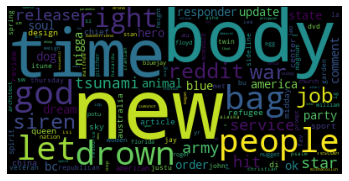

In [35]:
word_cloud = WordCloud(max_font_size=100).generate(fake_disaster)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

## **Word embeddings and further data preparation**

##### **Importing necessary modules from tensorflow**

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

##### **Instanciating the tokenizer**

In [37]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(tweet.text_wostop)
tweet["tweet_encoded"] = tokenizer.texts_to_sequences(tweet.text_wostop)
tweet["tweet_word"] = tweet["text_wostop"].apply(lambda x: len(x))
tweet = tweet[tweet["tweet_word"]!=0]

In [38]:
tweet.head()

,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,text_wostop,tweet_encoded,tweet_word
0,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,deed reason earthquake allah forgive,"[3654, 419, 173, 1362, 1926]",36
1,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,forest fire near la ronge sask canada,"[120, 2, 163, 491, 5504, 5505, 961]",37
2,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,resident ask shelter place notify officer evac...,"[1363, 420, 1677, 322, 5506, 294, 186, 1677, 3...",79
3,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,130 people receive wildfire evacuation order c...,"[2306, 4, 2307, 70, 186, 295, 33]",55
4,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,send photo ruby alaska smoke wildfire pour school,"[179, 121, 5507, 1678, 174, 70, 2308, 112]",49


In [39]:
tokenizer.word_index

{'like': 1,
 'fire': 2,
 'new': 3,
 'people': 4,
 'news': 5,
 'burn': 6,
 'video': 7,
 'kill': 8,
 '2': 9,
 'crash': 10,
 'come': 11,
 'bomb': 12,
 'emergency': 13,
 'disaster': 14,
 'time': 15,
 'attack': 16,
 'body': 17,
 'year': 18,
 'look': 19,
 'police': 20,
 'know': 21,
 'man': 22,
 'day': 23,
 'home': 24,
 'family': 25,
 'good': 26,
 'think': 27,
 'flood': 28,
 'building': 29,
 'love': 30,
 'storm': 31,
 'train': 32,
 'california': 33,
 'watch': 34,
 'suicide': 35,
 'want': 36,
 '3': 37,
 'work': 38,
 'world': 39,
 'collapse': 40,
 'life': 41,
 'retweet': 42,
 'scream': 43,
 'loud': 44,
 'car': 45,
 's': 46,
 'death': 47,
 'cause': 48,
 'today': 49,
 'need': 50,
 'laugh': 51,
 'nuclear': 52,
 'wreck': 53,
 'drown': 54,
 'youtube': 55,
 'war': 56,
 'bag': 57,
 'dead': 58,
 'accident': 59,
 'destroy': 60,
 'let': 61,
 'plan': 62,
 'way': 63,
 'fear': 64,
 'weapon': 65,
 'help': 66,
 'hiroshima': 67,
 'live': 68,
 'feel': 69,
 'wildfire': 70,
 'find': 71,
 'wound': 72,
 'injury': 7

In [40]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

15745

## **Building the baseline simple RNN model**

##### **Finding the size of the longest sequence**

In [41]:
tweet["number_encoded"] = tweet["tweet_encoded"].apply(lambda x: len(x))
tweet.head()

,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,text_wostop,tweet_encoded,tweet_word,number_encoded
0,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,deed reason earthquake allah forgive,"[3654, 419, 173, 1362, 1926]",36,5
1,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,forest fire near la ronge sask canada,"[120, 2, 163, 491, 5504, 5505, 961]",37,7
2,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,resident ask shelter place notify officer evac...,"[1363, 420, 1677, 322, 5506, 294, 186, 1677, 3...",79,11
3,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,130 people receive wildfire evacuation order c...,"[2306, 4, 2307, 70, 186, 295, 33]",55,7
4,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,send photo ruby alaska smoke wildfire pour school,"[179, 121, 5507, 1678, 174, 70, 2308, 112]",49,8


In [42]:
tweet.number_encoded.max()

24

##### **Padding the sequences so that all the tweets are of equal lengths**

In [43]:
tweets_pad = tf.keras.preprocessing.sequence.pad_sequences(tweet.tweet_encoded, maxlen=24, padding="post")

In [44]:
tweets_pad[7000]

array([   22,   586,  5438,   586,  5438, 15040,  1612,   293, 15041,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0], dtype=int32)

##### **Getting the slices of the array in the form of Python objects**

In [45]:
full_ds = tf.data.Dataset.from_tensor_slices((tweets_pad, tweet.target))

##### **Train test split**

In [46]:
TAKE_SIZE = int(0.8*tweet.shape[0])

train_data = full_ds.take(TAKE_SIZE).shuffle(TAKE_SIZE)
train_data = train_data.batch(64)

test_data = full_ds.skip(TAKE_SIZE)
test_data = test_data.batch(64)

##### **Looking at a batch of data**

In [47]:
for text in train_data.take(1):
  print(text)

(<tf.Tensor: shape=(64, 24), dtype=int32, numpy=
array([[13545,  2293,   311, ...,     0,     0,     0],
       [  121, 12951, 12952, ...,     0,     0,     0],
       [  550,    75,  3259, ...,     0,     0,     0],
       ...,
       [12285,  1604,   110, ...,     0,     0,     0],
       [ 7963,  7964,   135, ...,     0,     0,     0],
       [  337,    11,   677, ...,     0,     0,     0]], dtype=int32)>, <tf.Tensor: shape=(64,), dtype=int64, numpy=
array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0])>)


In [48]:
text[0].shape

TensorShape([64, 24])

In [50]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

model = tf.keras.Sequential([
                  # Word Embedding layer           
                  Embedding(vocab_size, 64, name="embedding"),
                  SimpleRNN(units=64, return_sequences=True),
                  SimpleRNN(units=32, return_sequences=False),
                  Dense(16, activation="relu"),
                  Dense(8, activation="relu"),
                  Dense(1, activation="sigmoid")
])

##### **Compiling the model**

In [51]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["accuracy"])


##### **Looking at a summary of the model**

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1007680   
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 64)          8256      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,019,713
Trainable params: 1,019,713
Non-

##### **Training the model**

In [53]:
model.fit(train_data,
          epochs=20, 
          validation_data=test_data
          )

Epoch 1/20
96/96 [==============================] - 12s 80ms/step - loss: 0.6027 - accuracy: 0.6783 - val_loss: 0.5315 - val_accuracy: 0.7406
Epoch 2/20
96/96 [==============================] - 7s 76ms/step - loss: 0.2970 - accuracy: 0.8836 - val_loss: 0.6538 - val_accuracy: 0.7098
Epoch 3/20
96/96 [==============================] - 8s 80ms/step - loss: 0.1324 - accuracy: 0.9550 - val_loss: 0.7160 - val_accuracy: 0.7026
Epoch 4/20
96/96 [==============================] - 8s 84ms/step - loss: 0.0802 - accuracy: 0.9693 - val_loss: 0.8788 - val_accuracy: 0.6789
Epoch 5/20
96/96 [==============================] - 7s 77ms/step - loss: 0.0629 - accuracy: 0.9739 - val_loss: 0.8106 - val_accuracy: 0.7190
Epoch 6/20
96/96 [==============================] - 8s 79ms/step - loss: 0.0528 - accuracy: 0.9775 - val_loss: 0.8939 - val_accuracy: 0.7118
Epoch 7/20
96/96 [==============================] - 7s 77ms/step - loss: 0.0445 - accuracy: 0.9801 - val_loss: 1.0747 - val_accuracy: 0.6980
Epoch 8/20
9

##### **Plotting a graph showing the loss in relation to the number of epochs**

In [54]:
model_loss = pd.DataFrame(model.history.history)

In [55]:
model_loss.head(3)

,loss,accuracy,val_loss,val_accuracy
0,0.602684,0.678272,0.531471,0.740643
1,0.297028,0.883561,0.653757,0.709783
2,0.132426,0.955001,0.716014,0.702561


In [56]:
loss = model_loss[["loss","val_loss"]]
accuracy = model_loss[["accuracy","val_accuracy"]]

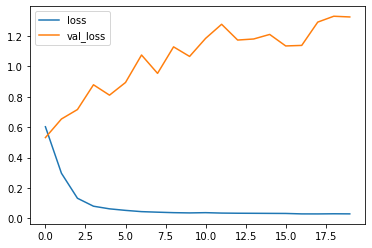

In [58]:
loss.plot()

##### **Plotting a graph showing the accuracy in relation to the number of epochs**

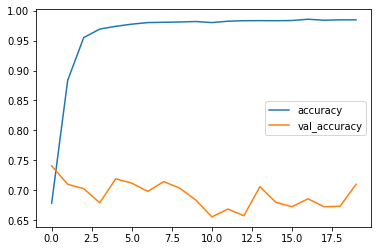

In [59]:
accuracy.plot()

##### *The model starts to overfit after the second epoch*

##### **Trying to predict if a tweet is a disater tweet or not**

In [60]:
sentence = "This is an earthquake"
sentence_tokenize = tokenizer.texts_to_sequences(sentence)
sentence_pad = tf.keras.preprocessing.sequence.pad_sequences(sentence_tokenize, padding="post")
model.predict(sentence_pad)

array([[0.5768381 ],
       [0.44635427],
       [0.57901216],
       [0.55251133],
       [0.57901216],
       [0.57901216],
       [0.55251133],
       [0.57901216],
       [0.57901216],
       [0.57901216],
       [0.57901216],
       [0.60324603],
       [0.57901216],
       [0.6213189 ],
       [0.5768381 ],
       [0.44635427],
       [0.5957713 ],
       [0.58767575],
       [0.57901216],
       [0.6194138 ],
       [0.60324603]], dtype=float32)

## **Building a second model : replacing the Simple RNN layers by Gated Recurrent Unit (GRU) layers**

In [66]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

model_gru = tf.keras.Sequential([
                  Embedding(vocab_size, 64, name="embedding"),
                  GRU(units=64, return_sequences=True),
                  GRU(units=32, return_sequences=False),
                  Dense(16, activation="relu"),
                  Dense(8, activation="relu"),
                  Dense(1, activation="sigmoid")
])

##### **Compiling the model**

In [67]:
model_gru.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

##### **Stopping training when a monitored quantity - val_loss in this case - does not improve anymore**

In [68]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

##### **Looking at a summary of the model**

In [69]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1007680   
                                                                 
 gru_2 (GRU)                 (None, None, 64)          24960     
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,042,721
Trainable params: 1,042,721
No

##### **Training the model**

In [70]:
model_gru.fit(train_data,
          epochs=200, 
          validation_data=test_data,
          callbacks=[early_stop]
          )

Epoch 1/200
96/96 [==============================] - 6s 27ms/step - loss: 0.6823 - accuracy: 0.5776 - val_loss: 0.6927 - val_accuracy: 0.5345
Epoch 2/200
96/96 [==============================] - 2s 19ms/step - loss: 0.5575 - accuracy: 0.7154 - val_loss: 0.4682 - val_accuracy: 0.7919
Epoch 3/200
96/96 [==============================] - 2s 19ms/step - loss: 0.3112 - accuracy: 0.8814 - val_loss: 0.5141 - val_accuracy: 0.7932
Epoch 4/200
96/96 [==============================] - 2s 18ms/step - loss: 0.1881 - accuracy: 0.9368 - val_loss: 0.5772 - val_accuracy: 0.7282
Epoch 5/200
96/96 [==============================] - 2s 18ms/step - loss: 0.1267 - accuracy: 0.9604 - val_loss: 0.7908 - val_accuracy: 0.7328
Epoch 6/200
96/96 [==============================] - 2s 18ms/step - loss: 0.1019 - accuracy: 0.9706 - val_loss: 0.7490 - val_accuracy: 0.7439
Epoch 7/200
96/96 [==============================] - 2s 18ms/step - loss: 0.0819 - accuracy: 0.9760 - val_loss: 0.6680 - val_accuracy: 0.7636
Epoch 

##### **Plotting a graph showing the loss in relation to the number of epochs**

In [71]:
model_loss = pd.DataFrame(model_gru.history.history)
loss_gru = model_loss[["loss","val_loss"]]
accuracy_gru = model_loss[["accuracy","val_accuracy"]]

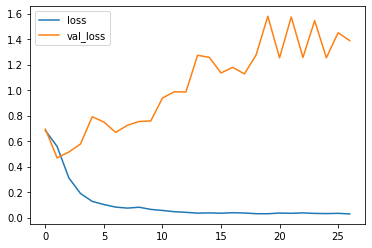

In [72]:
loss_gru.plot()

##### **Plotting a graph showing the accuracy in relation to the number of epochs**

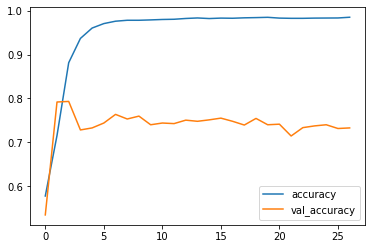

In [73]:
accuracy_gru.plot()

##### *Once more, the model starts to overfit after the third epoch, implying that the Gated recurrent unit is not helping the model with the overfitting problem. However, the accuracy is much better with GRU (0.7932) than with simple RNN (0.7098).*

##### **Trying to predict if a tweet is a disater tweet or not**

In [74]:
sentence = "This is an earthquake"
sentence_tokenize = tokenizer.texts_to_sequences(sentence)
sentence_pad = tf.keras.preprocessing.sequence.pad_sequences(sentence_tokenize, padding="post")
model_gru.predict(sentence_pad)

array([[0.52611023],
       [0.46242073],
       [0.468751  ],
       [0.43305215],
       [0.468751  ],
       [0.468751  ],
       [0.43305215],
       [0.468751  ],
       [0.468751  ],
       [0.468751  ],
       [0.468751  ],
       [0.41497752],
       [0.468751  ],
       [0.3914472 ],
       [0.52611023],
       [0.46242073],
       [0.45697778],
       [0.46837136],
       [0.468751  ],
       [0.45962307],
       [0.41497752]], dtype=float32)

## **Building a third model : replacing the Simple RNN layers by Long short-term memory (LSTM) layers**

In [75]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

model_lstm = tf.keras.Sequential([
                  Embedding(vocab_size, 64, name="embedding"),
                  LSTM(units=64, return_sequences=True),
                  LSTM(units=32, return_sequences=False),
                  Dense(16, activation="relu"),
                  Dense(8, activation="relu"),
                  Dense(1, activation="sigmoid")
])

##### **Compiling the model**

In [76]:
model_lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

##### **Stopping training when a monitored quantity - val_loss in this case - does not improve anymore**

In [77]:
early_stop_lstm = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)

##### **Looking at a summary of the model**

In [78]:
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1007680   
                                                                 
 lstm (LSTM)                 (None, None, 64)          33024     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,053,793
Trainable params: 1,053,793
No

##### **Training the model**

In [79]:
model_lstm.fit(train_data,
          epochs=200, 
          validation_data=test_data,
          callbacks=[early_stop_lstm]
          )

Epoch 1/200
96/96 [==============================] - 7s 29ms/step - loss: 0.6064 - accuracy: 0.6681 - val_loss: 0.5095 - val_accuracy: 0.7571
Epoch 2/200
96/96 [==============================] - 2s 19ms/step - loss: 0.3406 - accuracy: 0.8729 - val_loss: 0.4841 - val_accuracy: 0.7787
Epoch 3/200
96/96 [==============================] - 2s 19ms/step - loss: 0.1948 - accuracy: 0.9364 - val_loss: 0.5668 - val_accuracy: 0.7538
Epoch 4/200
96/96 [==============================] - 2s 19ms/step - loss: 0.1268 - accuracy: 0.9622 - val_loss: 0.7083 - val_accuracy: 0.7492
Epoch 5/200
96/96 [==============================] - 2s 19ms/step - loss: 0.1041 - accuracy: 0.9699 - val_loss: 0.6495 - val_accuracy: 0.7603
Epoch 6/200
96/96 [==============================] - 2s 19ms/step - loss: 0.0869 - accuracy: 0.9757 - val_loss: 0.8525 - val_accuracy: 0.7544
Epoch 7/200
96/96 [==============================] - 2s 19ms/step - loss: 0.0774 - accuracy: 0.9764 - val_loss: 0.7575 - val_accuracy: 0.7433
Epoch 

##### **Plotting a graph showing the loss in relation to the number of epochs**

In [80]:
model_loss = pd.DataFrame(model_lstm.history.history)
loss_lstm = model_loss[["loss","val_loss"]]
accuracy_lstm = model_loss[["accuracy","val_accuracy"]]

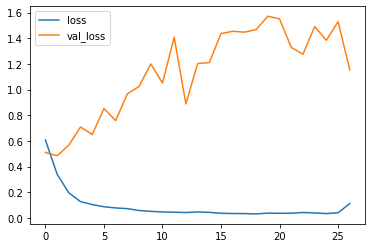

In [81]:
loss_lstm.plot()

##### **Plotting a graph showing the accuracy in relation to the number of epochs**

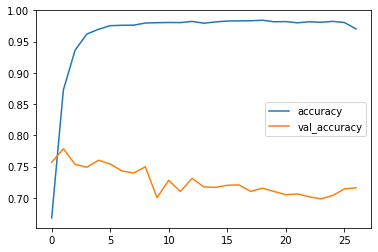

In [82]:
accuracy_lstm.plot()

##### *This time, the model starts to overfit after the second epoch. The Long short-term memory is not helping much  with the overfitting problem. Furthermore, the accuracy reached with the LSTM (0.7787) is worse than with the simple RNN (0.7098) and the GRU (0.7932).**

##### **Trying to predict if a tweet is a disater tweet or not**

In [83]:
sentence = "This is an earthquake"
sentence_tokenize = tokenizer.texts_to_sequences(sentence)
sentence_pad = tf.keras.preprocessing.sequence.pad_sequences(sentence_tokenize, padding="post")
model_gru.predict(sentence_pad)

array([[0.52611023],
       [0.46242073],
       [0.468751  ],
       [0.43305215],
       [0.468751  ],
       [0.468751  ],
       [0.43305215],
       [0.468751  ],
       [0.468751  ],
       [0.468751  ],
       [0.468751  ],
       [0.41497752],
       [0.468751  ],
       [0.3914472 ],
       [0.52611023],
       [0.46242073],
       [0.45697778],
       [0.46837136],
       [0.468751  ],
       [0.45962307],
       [0.41497752]], dtype=float32)

# **Summary and metrics of the three models tested**

In [85]:
summary = [["Simple recurrent neural network", "0.6538 - 0.7098"],
           ["Gated recurrent unit", "0.5141 - 0.7932"],
           ["Long short-term memory", "0.4841 - 0.7787"]]

summary = pd.DataFrame(summary, index=[0, 1, 2], columns=["Model description", "Best validation loss/validation accuracy pair"])

In [86]:
summary

,Model description,Best validation loss/validation accuracy pair
0,Simple recurrent neural network,0.6538 - 0.7098
1,Gated recurrent unit,0.5141 - 0.7932
2,Long short-term memory,0.4841 - 0.7787


# **Conclusion**

##### The GRU is the model which gives the best performance amongst the three models tested with the tweets dataset.
##### It is encouraging to have more or less good results for a first experience with natural language processing. Nevertheless, I am not satisfied with my personal comprehension of this complex subject. I will continue to practice again and again till I get more familiar with the different steps of the process.